In [1]:
#This docoument demonstrates how simulate a compound Poisson process. Consider a shop where customers arrive in an exponential distribution with rate . mean of . The number of customers for each arrival follows a geometric distribution with parameter plus one. mean of . expectation of the number of customers for each arrival is . All random values are independent. Example of generating exponential random variables:

In [2]:
lambda <- 20
rexp(1, lambda)

[1] 0.01074528

In [3]:
lambda <- 20
num_rv <- 5
rexp(num_rv, lambda)

[1] 0.025785057 0.079579252 0.077454204 0.004663626 0.054909795

In [4]:
#From time 0 to 1, how many times will customers arrive? Of course, this is random. num_arrivals represents the total arrival numbers up to time 1.

In [5]:
arrivals <- numeric()
while (sum(arrivals)<1){
arrivals <- c(arrivals, rexp(1, lambda))   
} 
num_arrivals <- length(arrivals) - 1

arrivals
num_arrivals

[1] 1.128442e-02 2.318480e-02 2.839020e-02 1.656791e-01 6.041851e-02
 [6] 3.301169e-02 5.585907e-02 6.432271e-02 7.411389e-03 1.691253e-02
[11] 4.008673e-02 2.665587e-02 2.013154e-02 7.520167e-03 1.706439e-02
[16] 2.263996e-01 7.173819e-02 2.205678e-03 2.646006e-05 5.358396e-02
[21] 4.575176e-02 3.636711e-02

[1] 21

In [7]:
#The number of cumstomers in each arrival is determined by a geometric distribution plus one.

In [8]:
p = 0.4
(num_customer <- rgeom(1, p) + 1)  

[1] 4

In [9]:
#The following plot represents the customer arrivals up to time 1. You may use loop, until the total sum of arrival exceeds time 1. Inside the loop, you may generate the random numbers of cumstomers and assign to a vector. To plot stair type graph, use type='s' .

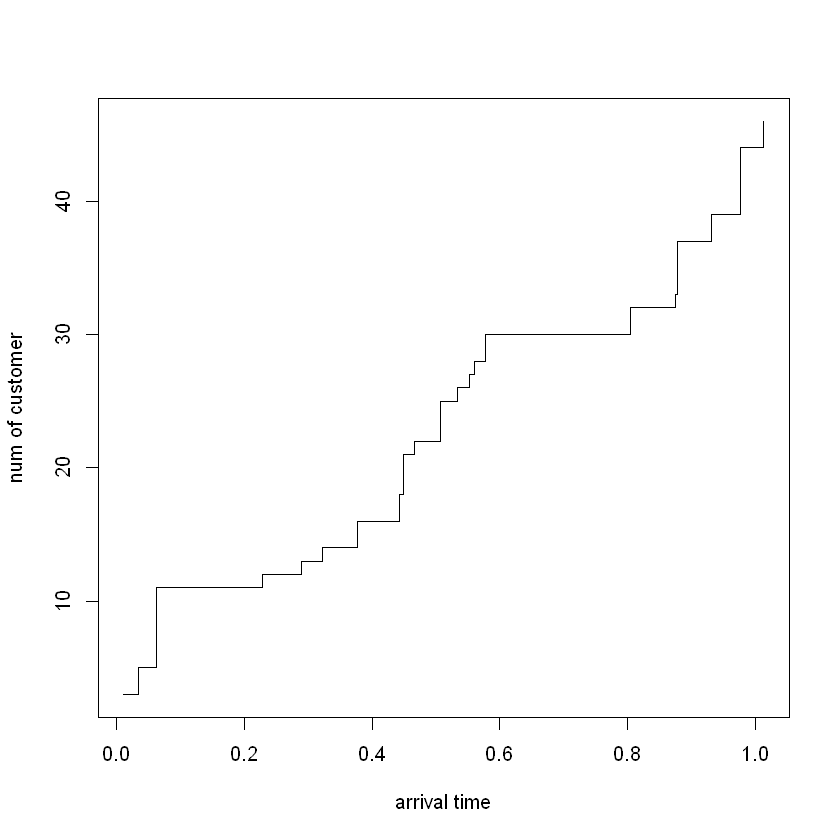

In [10]:
num_customer<-rgeom(arrivals,p)+1

plot(cumsum(arrivals),cumsum(num_customer),type="s",ylab="num of customer",xlab="arrival time")

In [11]:
#In this case, the total number of customer up to time 1 is:

In [12]:
cumsum(num_customer)[cumsum(num_customer)==max(cumsum(num_customer))]
cumsum(num_customer)[length(num_customer)]

[1] 46

[1] 46

In [13]:
#Repeat the above procedure and draw more lines with different colors.

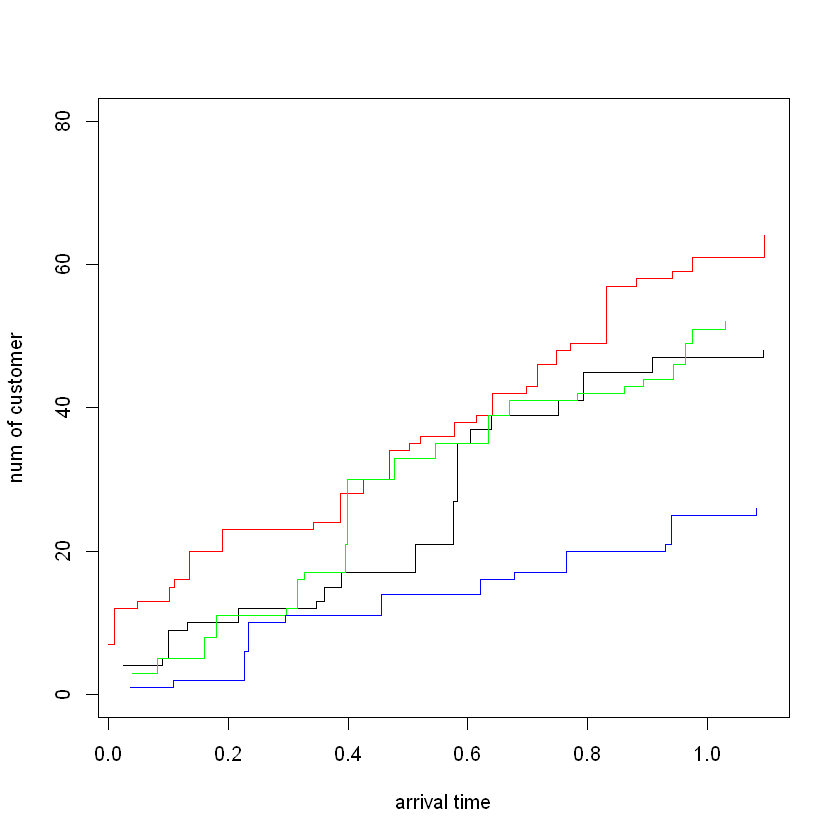

In [14]:
lambda<-20
i<- numeric()
p<-0.4

for(koo in 1:4){
  while (sum(i)<1){
    i <- c(i, rexp(1, lambda))
  }
  assign(paste0("arrivals",koo),i)                      #문자열을 for문에 넣어 객체를 자동생성
  i<- numeric()
}

num_arrivals1 <- length(arrivals1) - 1
num_arrivals2 <- length(arrivals2) - 1
num_arrivals3 <- length(arrivals3) - 1
num_arrivals4 <- length(arrivals4) - 1


num_customer1<-rgeom(arrivals1,p)+1
num_customer2<-rgeom(arrivals2,p)+1
num_customer3<-rgeom(arrivals3,p)+1
num_customer4<-rgeom(arrivals4,p)+1





plot(cumsum(arrivals1),cumsum(num_customer1),type="s",ylab="num of customer",xlab="arrival time",ylim=c(0,80))
lines(cumsum(arrivals2),cumsum(num_customer2),type="s",col="red")
lines(cumsum(arrivals3),cumsum(num_customer3),type="s",col="green")
lines(cumsum(arrivals4),cumsum(num_customer4),type="s",col="blue")


In [15]:
#Now simulate this procedure up to 1000 times. first, compute the total number of customers up to time 1 for each simulation. second, compute the mean of the total number of customers up to time 1 for each simulation. third, plot the means of the total number of customers with simulation number.

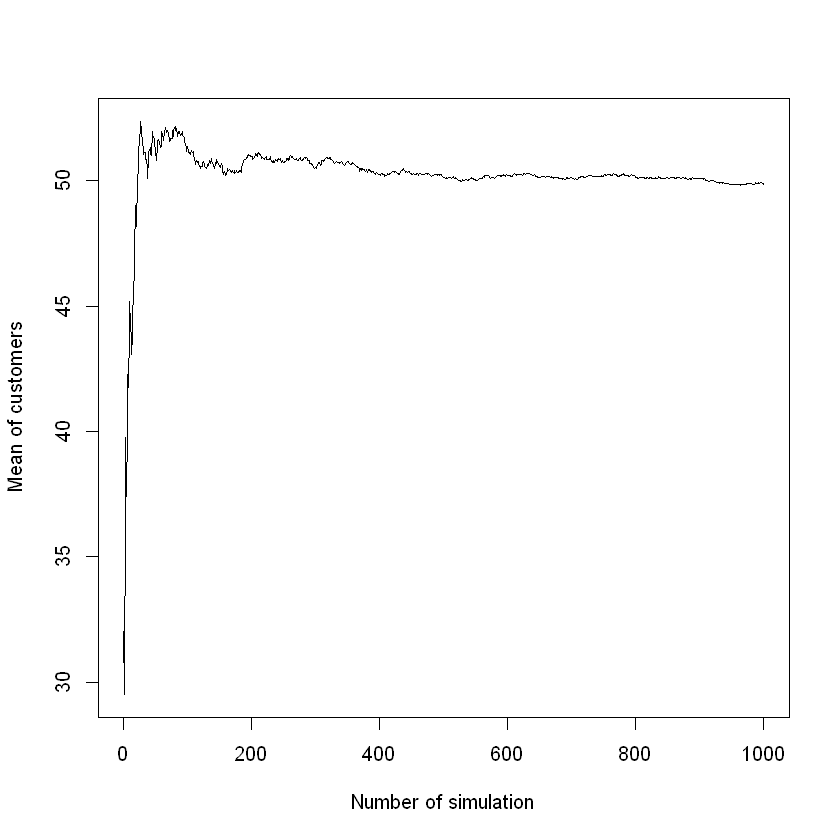

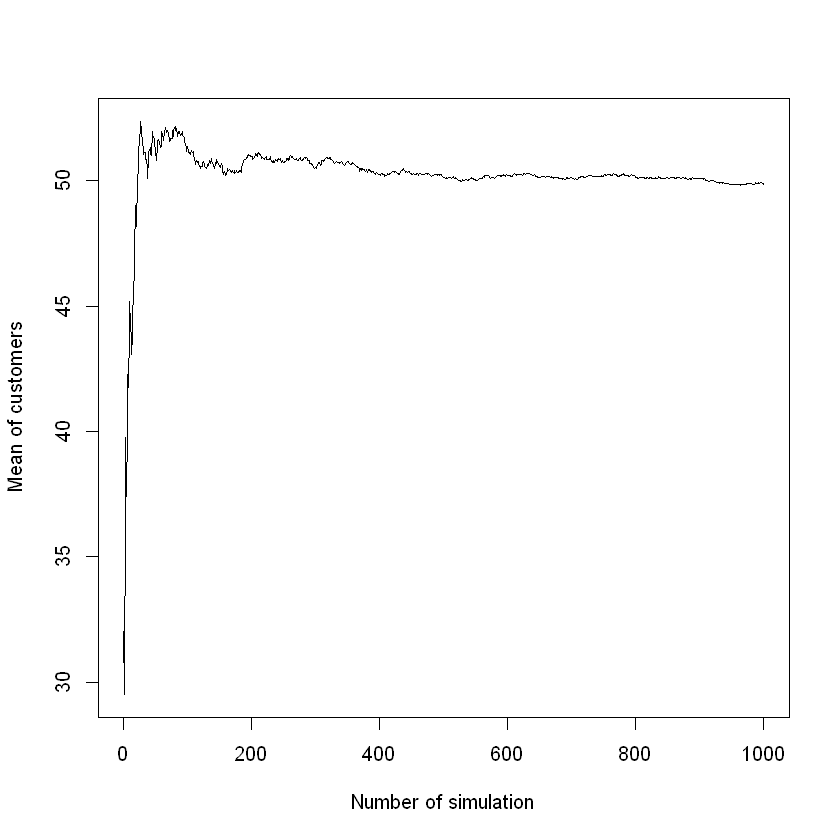

In [17]:
library(dplyr)            #cummean을 사용하기 위해서는 dplyr 라이브러리가 필요

n<-1000
k<-c()
for(i in 1:n){
  arrivals1<-numeric()
  while (sum(arrivals1)<1) {
    arrivals1<-c(arrivals1,rexp(1,lambda))
  }
  num_arrivals1<-length(arrivals1)-1
  num_customer1<-rgeom(num_arrivals1,0.4)+1  
  
  a<-cumsum(num_customer1)[length(num_customer1)]
  
  k[i]<-a
}

plot(1:n,cummean(k),type="l",xlab="Number of simulation",ylab="Mean of customers")
plot(1:n,cumsum(k)/(1:1000),type="l",xlab="Number of simulation",ylab="Mean of customers")            #cummean을 꼭 사용하지 않아도 됨

In [ ]:
#Question : Which value does the mean of total num of customer converge with increasing simulation number?  #50

#Explain the theoritical value of the mean of total num of customer. #lambda=20인 지수분포는 사건이 발생하고 다음 사건이 발생하는데 걸리는 기대시간이 1/20이므로 #1시간동안 20번의 사건발생 기대가 가능하다. 즉, 총 20팀이 1시간동안 올것임 #p=0.4인 기하분포이므로 기댓값이 2.5명이 한팀 당 속해있을 것임 #따라서 평균 총 명수 2.5*20 = 50명 이다.